# <center><font color='navy'>Crypto Currency Data Analysis</font></center>

*******************************************************************************************************************************

In [42]:
%%html
<img src="https://i.ya-webdesign.com/images/crypto-coins-png.png"width=800 height=70>

   A cryptocurrency, or crypto is a binary data designed to work as a medium of exchange wherein individual coin ownership records are stored in a ledger existing in a form of a computerized database using strong cryptography to secure transaction records, to control the creation of additional coins, and to verify the transfer of coin ownership. Some crypto schemes use validators to maintain the cryptocurrency. In a proof-of-stake model, owners put up their tokens as collateral. In return, they get authority over the token in proportion to the amount they stake.

## <font color='navy'> Importing necessary libraries</font>

In [46]:
 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

from plotly.offline import  iplot

import plotly.express as px

import chart_studio.plotly as py
import cufflinks as cf
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

from plotly.offline import iplot,init_notebook_mode
init_notebook_mode(connected=True)
cf.go_offline(connected=True)


_For data visualization I have mainly used plotly, matplotlib and seaborn library.
These libraries are easy to use and provide interactive and quality graphs._

## <font color='navy'>Loading and reading the dataset</font>

In [2]:

data=pd.read_csv('../vinter_project/cc_ohlcv_by_exchange_landing_202109130813.csv/cc_ohlcv_by_exchange_landing_202109130813.csv')

## <font color='navy'>Description of the dataset</font>
1. __open__: _opening price_ 
2. __high__: _higher price of the day_
3. __low__ : _lower price of the day_
4. __volume__: _volume of transaction on the given day_
5. __price__: _closing price of the day_

In [43]:
data.head()

id           created_at    open    high     low  price    volume  \
0  722202  2021-09-12 07:48:47  0.0000  0.0000  0.0000  0.000      0.00   
1  737217  2021-09-12 07:52:12  0.0365  0.0371  0.0349  0.036  44107.49   
2  729209  2021-09-12 07:51:11  0.0000  0.0000  0.0000  0.000      0.00   
3  725205  2021-09-12 07:49:25  0.0000  0.0000  0.0000  0.000      0.00   
4  718198  2021-09-12 07:47:40  0.0000  0.0000  0.0000  0.000      0.00   

        amount      symbol  exchange      timestamp        date  
0          NaN  alpha-usdt      okex  1544400000000  2018-12-10  
1  1225208.056    lrc-usdt      okex  1544400000000  2018-12-10  
2          NaN     lrc-usd    kraken  1544400000000  2018-12-10  
3          NaN    gno-usdt   binance  1544400000000  2018-12-10  
4          NaN    xvs-usdt  poloniex  1544400000000  2018-12-10

In [44]:
# checking the datasets shape

data.shape

(837641, 12)

In [36]:
data.exchange.unique()

In [5]:
# Removing unncessary columns from the data

new_data= data[['date','open','high','low','volume','price','symbol','exchange']]
new_data['date']=pd.to_datetime(new_data['date'])

## <font color='navy'> Few rows of Dataset </font>

In [6]:
new_data.tail()

date       open       high       low      volume      price  \
837636 2021-09-12      2.278      2.423      2.22   250774.28      2.302   
837637 2021-09-12  32967.260  33346.200  32400.00  2571640.50  33122.950   
837638 2021-09-12  33002.380  33347.540  32463.85   156480.21  32986.990   
837639 2021-09-12  32950.000  33325.000  32360.00   327118.65  33070.000   
837640 2021-09-12  33026.000  33341.000  32484.00    72448.08  32942.000   

            symbol  exchange  
837636  audio-usdt       ftx  
837637     yfi-usd  coinbase  
837638     yfi-usd    gemini  
837639     yfi-usd       ftx  
837640     yfi-usd    kraken

## <font color='navy'> Missing value analysis</font>

In [7]:
new_data.isnull().sum()

date        0
open        0
high        0
low         0
volume      2
price       0
symbol      0
exchange    0
dtype: int64

In [8]:
#dropping the missing values

new_data.dropna(inplace=True)

## <font color='darkblue'> Statistical Analysis of data</font>

<AxesSubplot:>

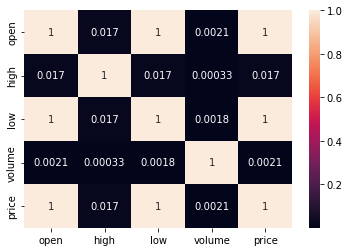

In [9]:
sns.heatmap(new_data[['date','open','high','low','volume','price','symbol','exchange']].corr(),annot=True,)

 <font color='mediumblue'><b>Price have high correlation with high ,low and open.</b></font>

In [10]:
#dataframe with top10 symbol.(calcuation refer below.)

lst=['btc-usdt','eth-usdt','btc-usd','eth-usd','doge-usdt','xrp-usdt','bnb-usdt','busd-usdt','ada-usdt','ltc-usdt']
 
top_10=new_data[new_data['symbol'].isin(lst)]

In [11]:
#dataframe with closing price 

close=pd.pivot_table(top_10,values='price',columns=['symbol'],index=['date'])

In [12]:
#dataframe with volume 
volume_=pd.pivot_table(top_10,values='volume',columns=['symbol'],index=['date'])

<AxesSubplot:ylabel='Count'>

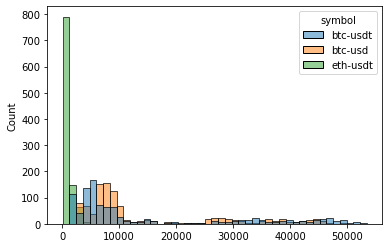

In [13]:
sns.histplot(close[['btc-usdt','btc-usd','eth-usdt']])

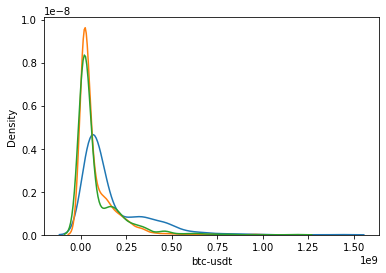

In [14]:
sns.kdeplot(volume_['btc-usdt'])
sns.kdeplot(volume_['btc-usd'])
sns.kdeplot(volume_['eth-usdt']);
#sns.kdeplot(volume_['ltc-usdt'])

<font color='mediumblue'><b>From the above diagrams we can see that the data is not normally distributed.</b> </font>

## <font color='navy'>Objectives/ Questions in mind:</font>

1. which exchange company does more sales?
2. Is there any change in the price of different exchanges for different currencies
3. what are the top10 currencies?
4. Is there an increase in the price of currencies over the period of time?
5. weekly base, monthly and yearly base analysis of price
6. which month and days have more price and transactions


## <font color='navy'><b>Top 10 priced symbol analysis</b></font>

In [15]:
x=new_data.groupby('symbol')['volume'].sum()


In [16]:
trace=go.Bar(x=x.sort_values(ascending=False).head(10).index,
            y=x.sort_values(ascending=False).head(10))
iplot([trace])

<font color='mediumblue'><b>Here is the top 10 crypto currency symbols with respect to their trading volume.</b></font>

In [17]:
# we can choose the top 10 currencies from dataset

#lst=['btc-usdt','eth-usdt','btc-usd','eth-usd','doge-usdt','xrp-usdt','bnb-usdt','busd-usdt','ada-usdt','ltc-usdt']
 
#top_10=new_data[new_data['symbol'].isin(lst)]

### <font color='navy'>Which exchange is having more trading volumes?</font>

In [18]:
e=top_10.groupby('exchange')['volume'].sum()
trace=go.Bar(x=e.sort_values(ascending=False).index,
            y=e.sort_values(ascending=False))
iplot([trace])

<font color='mediumblue'><b>The most number of trades are made by 'Binance' followed by 'Okex'.</b></font>

### <font color='navy'><b>Does the currencies have same price across multiple trading exchange?</b></font>

In [19]:

btcusdt=top_10[top_10['symbol']=='btc-usdt']
fig = px.scatter(btcusdt, x="price", y="volume", color="exchange",title="volume and price of 'btc_usdt currency'")
fig.show()

<font color='mediumblue'><b>No, they have different prices. For example, the btc_usdt currency is sold at different price by different exchanges. The above diagram depicts it.</b></font>

## <font color='navy'>Price and volume analysis.</font>

### <font color='navy'>Is there any relation between the price and volume of currencies?</font>

In [20]:

fig = px.scatter(btcusdt, x="price", y="volume", color="symbol",title="volume and price of 'btc_usdt currency'")
fig.show()

<font color='mediumblue'><b>The volume is high when the price is ranging between 30k to 60k. after that it is showing a decreasing trend.</b></font>

In [21]:
btcusd=top_10[top_10['symbol']=='btc-usd']
fig = px.scatter(btcusd, x="price", y="volume", color="symbol",title="volume and price of 'btc-usd currency'")
fig.show()

<font color='mediumblue'><b>We can see the volume is high when the price is ranging between 30k to 60k. after 60k it is showing a decreasing trend.</b></font>

In [22]:
ethusdt=top_10[top_10['symbol']=='eth-usdt']
fig = px.scatter(ethusdt, x="price", y="volume", color="symbol",title="volume and price of 'eth-usdt currency'")
fig.show()

<font color='mediumblue'><b>We can see the volume is high when the price is ranging between 2500 to 4000. after 4000 it is showing a decreasing trend.</b></font>

### <font color='navy'> Is there a change in the price of currencies over the period of time?</font>

In [23]:
close_without_doge=close.drop(columns=['doge-usdt'],axis=1)

In [24]:
fig = px.line(close_without_doge, x=close_without_doge.index, y=close_without_doge.columns, range_x=['2019-07-01','2021-09-10'])
fig.show()

In [25]:
fig = px.line(close, x=close.index, y=close['doge-usdt'], range_x=['2019-07-01','2021-09-10'])
fig.show()

<font color='mediumblue'><b>From the above graphs, we can conclude that the price of all the currencies are increasing over the period of time, except doge-usdt</b></font>

## <font color='navy'>Is there a change in volume of currencies over the period of time?</font>

In [26]:
fig = px.line(volume_, x=volume_.index, y=volume_.columns, range_x=['2019-07-01','2021-09-10'])
fig.show()

<font color='mediumblue'><b>This graph shows all the currencies volume are increasing rapidly till May 2021, but after that it decreases and not showing a high level increase.</b></font> 

## <font color='navy'>Month wise analysis of currencies.</font>

In [27]:
top_10['date']=pd.to_datetime(top_10['date'])

In [28]:

top_10['year']=top_10.date.dt.year
top_10['month']=top_10.date.dt.month
top_10['day']=top_10.date.dt.day

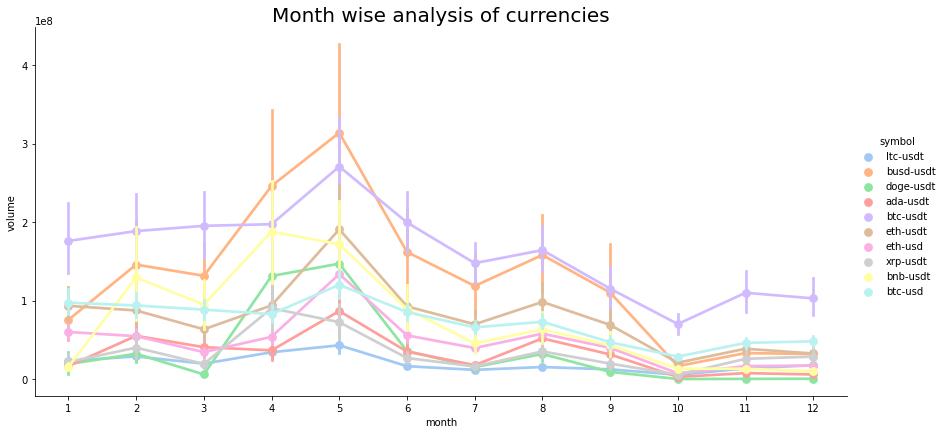

In [29]:
sns.catplot(x='month', 
            y='volume', 
            hue='symbol', 
            data=top_10,
            kind='point',
            legend=True,
            height=6,
            palette='pastel',
            aspect=2)
plt.title("Month wise analysis of currencies",fontdict={"fontsize":20});

<font color='mediumblue'><b>From the above graph, we can see that more volume of the trades have happened during the month of April and May. After that is a decline in the volume over the months.</b></font>

## <font color='navy'>Day wise analysis of currencies.</font>

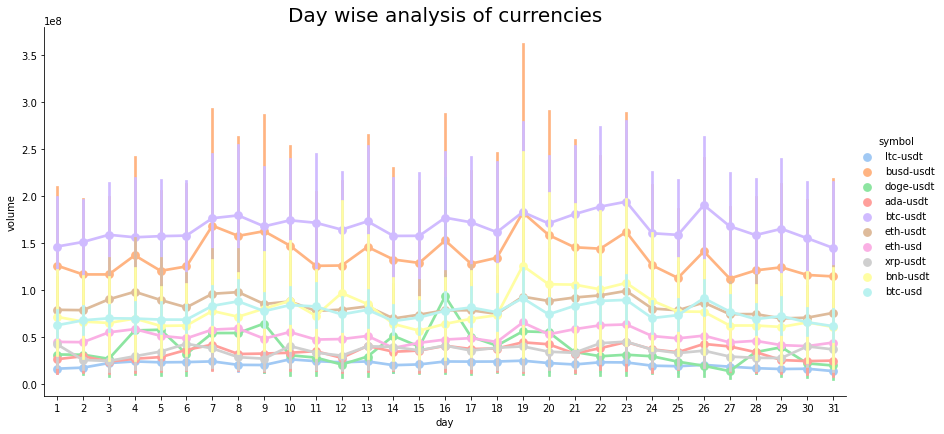

In [30]:
sns.catplot(x='day', 
            y='volume', 
            hue='symbol', 
            data=top_10,
            kind='point',
            legend=True,
            height=6,
            palette='pastel',
            aspect=2)
plt.title("Day wise analysis of currencies",fontdict={"fontsize":20});

<font color='mediumblue'><b>This graph shows there was a spike of trading volume during the third week.</b></font> 

## <font color='navy'>Analysis of symbol btc-usdt.</font>

In [31]:
fig = px.line(btcusdt,x='date', y='volume', title='Time Series with Range Slider and Selectors-symbol:btc-usdt-volume')
              


fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show();

<font color='mediumblue'><b>The volume is increasing steadly over the period of time and reaches the peak during july 2021. But after july it is showing a decreasing volume trend due to high price. In that case we can assume that people tend to buy more when there is a decrease in the price.</b></font> 

### <font color='navy'>Candle stick chart for open and closing price of btc-usdt.(1 year data)</font>

In [32]:
btcusdt['date']=pd.to_datetime(btcusdt['date'])
x_2021=btcusdt[btcusdt['date'].dt.year==2021]

In [33]:
fig = go.Figure(data=[go.Candlestick(x=x_2021['date'],
                open=x_2021['open'],
                high=x_2021['high'],
                low=x_2021['low'],
                close=x_2021['price'])])

fig.show()

# <center><font color='navy'>Conclusion</font></center>

<font color='navy'><b>The main points of this cryptocurrency data analysis are:</b></font>

1.<font color='navy'> The top 10 currencies in the market are btc-usd,btc-usdt,eth-usdt,doge-usdt,xrp-usdt,ltc-usdt,ada-usdt,bnb-usdt,busd-usdt etc.</font>

2.<font color='navy'> Binance is the highest trading exchange in the market.</font>

3.<font color='navy'> All exchanges are not trading the currencies for the same price.</font>

4.<font color='navy'> The price and volume of trades was slowly picking up in the market from the year 2018 to 2020. But after that there was a sudden increase on both the price and volume and it continued till May 2021.</font>

5.<font color='navy'> More trades happen during the month of May and June.</font>

6.<font color='navy'>The highest trading day is during the third week of the month.</font>
